

## Workflow:
1. Data Collection
2. Data Pre-Processing
3. Data Analysis
4. Optimum number of Clusters
5. Model Training: K-Means Clustering
6. Visualizing the Clusters

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

### Data Collection & Analysis

In [4]:
# loading the data from csv file to Pandas Dataframe
customer_data = pd.read_csv('datasets/Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.shape

(200, 5)

In [7]:
# getting more information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing the Annual Income Column & Spending Score Column for Clustering

In [10]:
X = customer_data.iloc[:, [3, 4]].values

In [11]:
X.shape

(200, 2)

In [13]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

### Choosing the optimum number of Clusters

Method: WCSS (Within Cluster Sums of Squares)

In [15]:
# finding wcss value for different number of clusters
import warnings
warnings.filterwarnings("ignore")

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25036.417604033984,
 21916.794789843727,
 20072.070939404006]

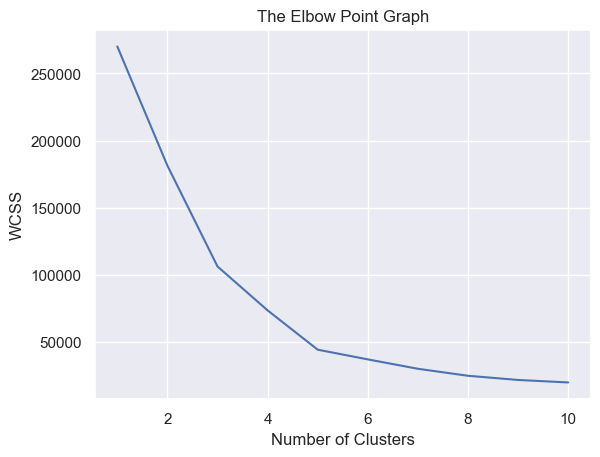

In [17]:
# plot an elbow graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

So our optimum number of clusters is 5

### Training the k-Means Clustering Model

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

In [19]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Visualizing all the Clusters

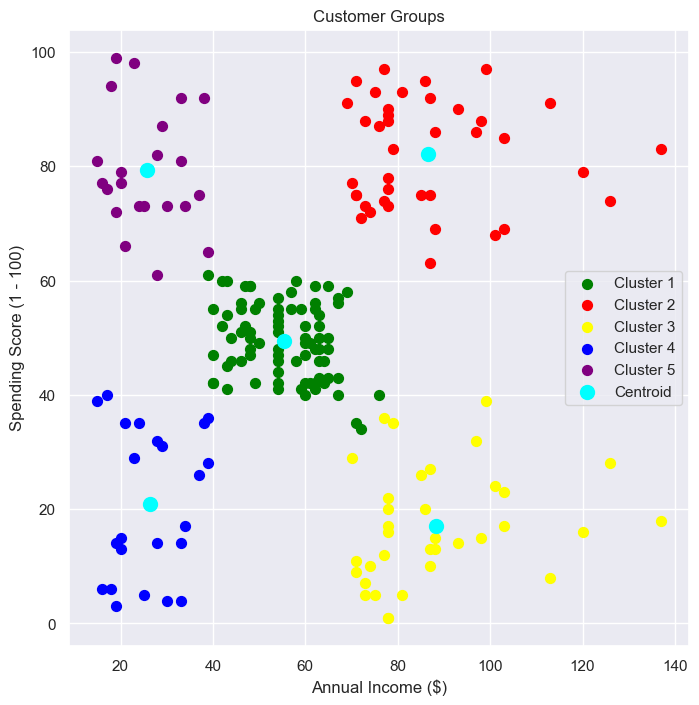

In [24]:
# plotting all the clusters and their centroids
plt.figure(figsize = (8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s= 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s= 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s= 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s= 50, c = 'blue', label = 'Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s= 50, c = 'purple', label = 'Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()

plt.show()

### Next Steps
We can make business decisions and lead more targeted marketing campaigns based on the segmentation of customer base. 